# Introduction to Image Processing

Mojdeh Rastgoo - Guillaume Lemaitre - Desire Sidibe

## **Spatial Filtering and de-noising**

The modules which are commonly used are entered in the following cell.

In [8]:
%matplotlib inline
#%pprint off

# Matplotlib library
import matplotlib.pyplot as plt
from matplotlib import cm

# Numpy library
import numpy as np

from skimage import io 
from skimage import img_as_ubyte
from skimage import img_as_float
from skimage import color


# import the function to add some noise
from skimage.util import random_noise


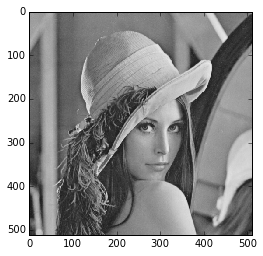

In [9]:
Path = './images/'
lena_im = io.imread(Path.__add__('lena-grey.bmp'))
lena_im = img_as_float(lena_im)
io.imshow(lena_im)

## Smoothing

### Mean filter 
Smooth the lena image, by mean filter, using different disk circles with radius of $ r = 1, 3, 5, 7$

Use [`skimage.filter.rank.mean`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean) and [`skimage.morphology.disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) function 

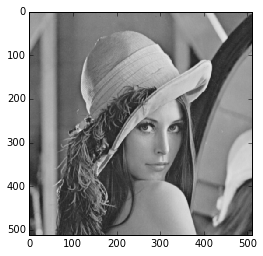

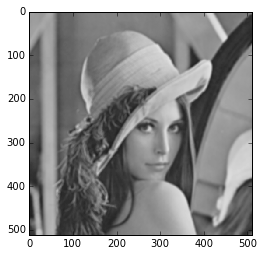

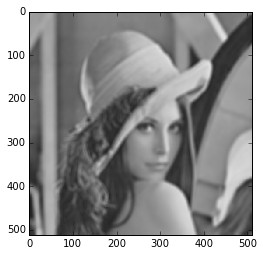

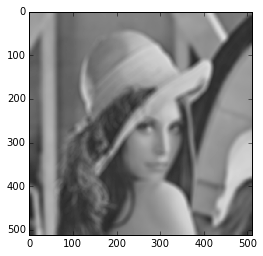

In [19]:
#####my imports

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import mean

#####

plt.figure()
lena_mean_disk1 = mean(lena_im, disk(1))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_mean_disk1)

plt.figure()
lena_mean_disk3 = mean(lena_im, disk(3))    #the filter is disk radius 3
io.imshow(lena_mean_disk3)

plt.figure()
lena_mean_disk5 = mean(lena_im, disk(5))    #the filter is disk radius 5
io.imshow(lena_mean_disk5)

plt.figure()
lena_mean_disk7 = mean(lena_im, disk(7))    #the filter is disk radius 7, so the square of the filter is 14x14 pixels
io.imshow(lena_mean_disk7)

### Filtering using convolution 
Once again apply the mean fiter, howver instead of using `filter.rank` make your mean mask having the same size as the last filter you applied and use convolution to apply the filter. 

The function [`ndimage.filters.convolve`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.filters.convolve.html#scipy.ndimage.filters.convolve) from `scipy` allows to compute the convolution between a mask (filter) and an image.

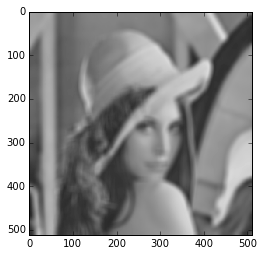

In [40]:
from skimage import filters
#so we create an array of 14x14
#is the same style as np.zeros((N,))
array_filt = np.ones((14,14))
#in order to make the average, we should divide by the sum of the elements in our filter
array_filt /= np.sum(array_filt)    
lena_conv = ndimage.convolve(lena_im,array_filt)
plt.figure()
io.imshow(lena_conv)
#so we can use the mean function, or we can create our own function(our own mask) and convolute with it.
#as we see we are getting the same result as doing the mean with a 14x14 filter. So we want to show the statement above.

Any filtering will work is a similar manner. Only the mask (filter) will change and will define the nature of the filtering.

### Common spatial filtering

In this section, you will learn about spatial filters which are commonly used in image processing. These filters were already implemented in `skimage` and can be directly used without applying the previous processing.

The modules `filters` and `filters.rank` implement well known filters.

In [41]:
#my imports
from skimage import filters
#although i had already imported them

#####  First-order edge detector

You already saw during the lecture the following edge detectors: (i) Roberts, (ii) Prewitt, and (iii) Sobel.
All these operators are an approximation of the first derivative. They are highly sensitive to noise even if Prewitt and Sobel have a smoothing process embedded.

Scharr opearator as an improved version of Sobel such that the operator provides a rotational symmetry.

The following functions are defined in `skimage`: `filters.roberts`, `filters.prewitt`, `filters.sobel`, and `filters.scharr`. 

**Apply these different filters on Leaves image (`leaves.jpg`).**

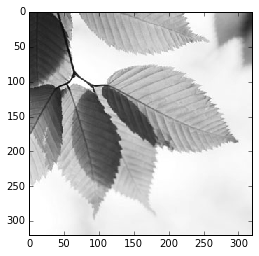

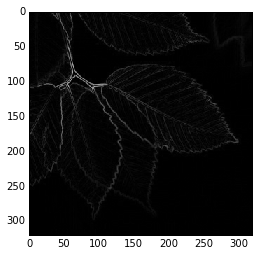

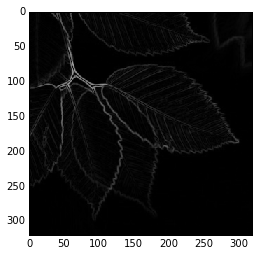

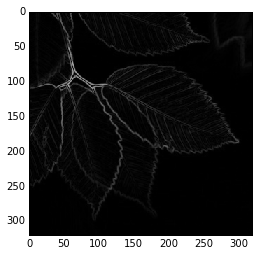

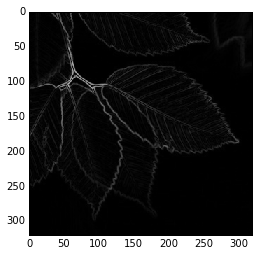

In [45]:
Path = './images/'
leaves = io.imread(Path.__add__('leaves.jpg'),as_grey=True)
leaves = img_as_float(leaves)
io.imshow(leaves)

plt.figure()
leaves_robert = filters.roberts(leaves)
io.imshow(leaves_rob)

plt.figure()
leaves_prewitt = filters.prewitt(leaves)
io.imshow(leaves_prewitt)

plt.figure()
leaves_sobel = filters.sobel(leaves)
io.imshow(leaves_sobel)

plt.figure()
leaves_scharr = filters.scharr(leaves)
io.imshow(leaves_scharr)

##### Second-order edge detector

The second order edge detector is using the Laplace kernel as seen in lectures.

The `skimage` toolbox does not provide any implementation of this filter (yet). The `scipy` toolbox, however, does through the function `ndimage.filters.laplace`.

**Apply this filter on the Leaves image.**

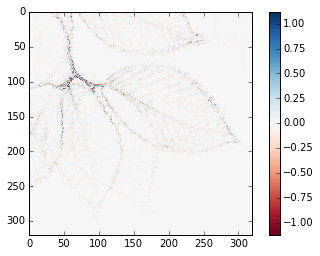

In [48]:
plt.figure()
leaves_laplace = ndimage.filters.laplace(leaves)
io.imshow(leaves_laplace)


## Denoising filters

Different filters can be applied in the spatial domain to remove the noise.
These filters can be found in the module `filters.rank`.

Before to start denoising the image, we need to generate some corrupted image using the noise generator from `skimage`.
For this purpose, we will use the function `util.random_noise`.

**Generate corrupted some Lena images with gaussian noise, salt & peppers noise, and speckle noise. Keep the default parameters.**

In [49]:
from skimage import util

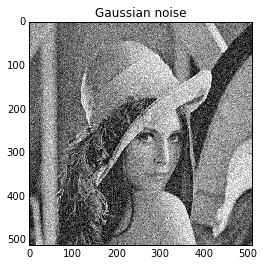

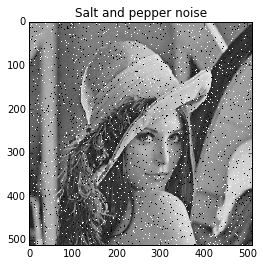

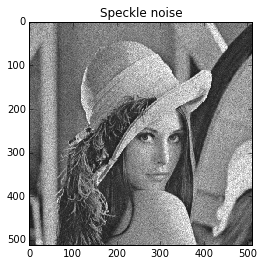

In [50]:
# Corrupt Lena
lena_gaussian = util.random_noise(lena_im, mode='gaussian')
lena_sp = util.random_noise(lena_im, mode='s&p')
lena_speckle = util.random_noise(lena_im, mode='speckle')

# Show the different corrupted Lena
plt.figure()
io.imshow(lena_gaussian)
plt.title('Gaussian noise')          
plt.figure()
io.imshow(lena_sp)
plt.title('Salt and pepper noise')
plt.figure()
io.imshow(lena_speckle)
plt.title('Speckle noise')

**Apply `median`, `mean` and `alpha-trimmed` mean filter on different corrupted Lena images with the mask corresponding to disk 1 and 3.**

 `alpha-trimmed` ([`mean_percentile`](http://scikit-image.org/docs/dev/api/skimage.filters.rank.html#skimage.filters.rank.mean_percentile)) mean filter works similar to normal mean filter. However, it considers only the grey values inside a specific range.

** mean filter: ** 

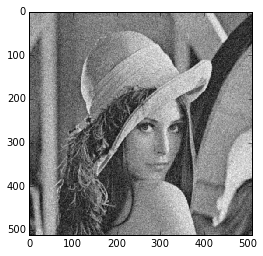

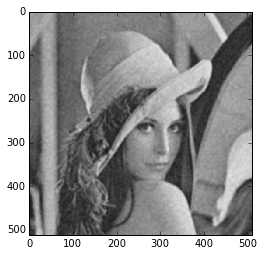

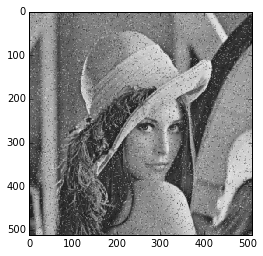

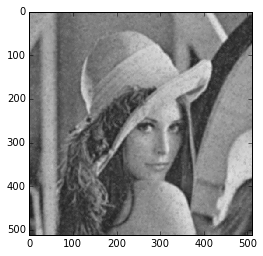

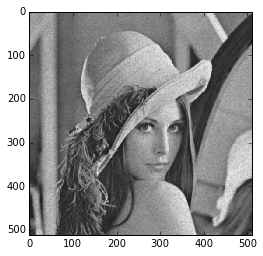

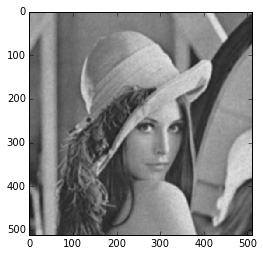

In [56]:
plt.figure()
lena_gaussian_mean1 = mean(lena_gaussian, disk(1))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_gaussian_mean1)

plt.figure()
lena_gaussian_mean3 = mean(lena_gaussian, disk(3))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_gaussian_mean3)

plt.figure()
lena_sp_mean1 = mean(lena_sp, disk(1))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_sp_mean1)

plt.figure()
lena_sp_mean3 = mean(lena_sp, disk(3))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_sp_mean3)

plt.figure()
lena_speckle_mean1 = mean(lena_speckle, disk(1))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_speckle_mean1)

plt.figure()
lena_speckle_mean3 = mean(lena_speckle, disk(3))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_speckle_mean3)

** alpha-trimmed mean filter: **

Apply this function on the different corrupted Lena by considering the gray value in the range [0.05, 0.95].

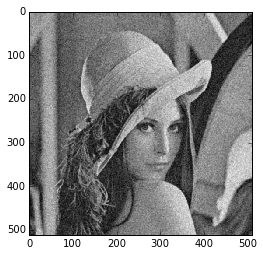

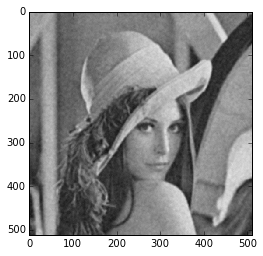

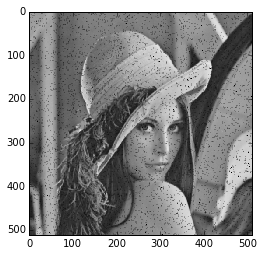

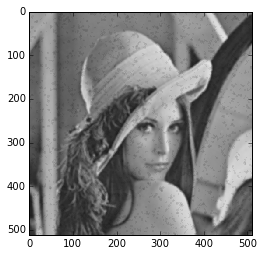

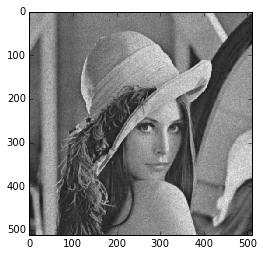

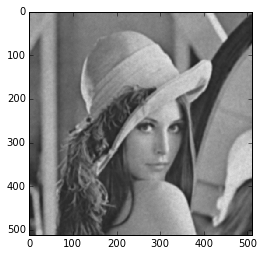

In [66]:
#####my imports

from skimage.filters.rank import mean_percentile

#####

#mean_percentile -> Only greyvalues between percentiles [p0, p1] are considered in the filter.
#so it's a local mean. If I expand that range given to the maximum, is like using normal mean.

plt.figure()
lena_gaussian_mean1_percentile = mean_percentile(lena_gaussian, disk(1), None,None ,False,False ,0.05, 0.95)    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_gaussian_mean1_percentile)

plt.figure()
lena_gaussian_mean3_percentile = mean_percentile(lena_gaussian, disk(3), None,None ,False,False ,0.05, 0.95)    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_gaussian_mean3_percentile)

plt.figure()
lena_sp_mean1_percentile = mean_percentile(lena_sp, disk(1), None,None ,False,False ,0.05, 0.95)    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_sp_mean1_percentile)

plt.figure()
lena_sp_mean3_percentile = mean_percentile(lena_sp, disk(3), None,None ,False,False ,0.05, 0.95)    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_sp_mean3_percentile)

plt.figure()
lena_speckle_mean1_percentile = mean_percentile(lena_speckle, disk(1), None,None ,False,False ,0.05, 0.95)    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_speckle_mean1_percentile)

plt.figure()
lena_speckle_mean3_percentile = mean_percentile(lena_speckle, disk(3), None,None ,False,False ,0.05, 0.95)    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_speckle_mean3_percentile)

** median filter: **

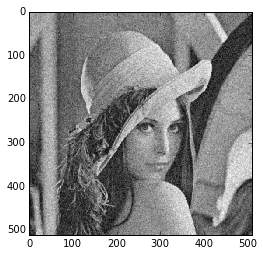

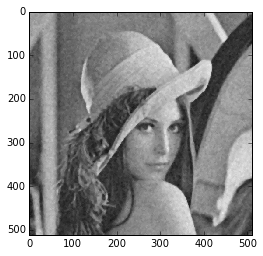

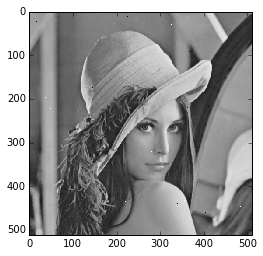

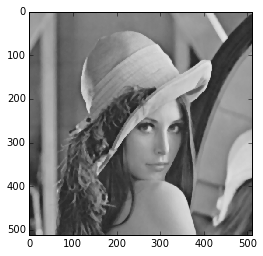

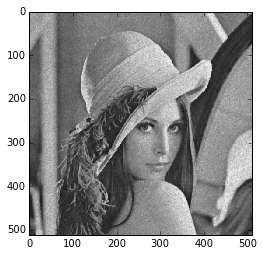

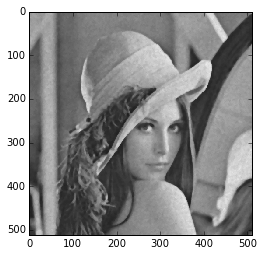

In [68]:
#####my imports

from skimage.filters.rank import median

#####

#
#

plt.figure()
lena_gaussian_median1 = median(lena_gaussian, disk(1))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_gaussian_median1)

plt.figure()
lena_gaussian_median3 = median(lena_gaussian, disk(3))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_gaussian_median3)

plt.figure()
lena_sp_median1 = median(lena_sp, disk(1))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_sp_median1)

plt.figure()
lena_sp_median3 = median(lena_sp, disk(3))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_sp_median3)

plt.figure()
lena_speckle_median1 = median(lena_speckle, disk(1))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_speckle_median1)

plt.figure()
lena_speckle_median3 = median(lena_speckle, disk(3))    #the filter is disk with radius 1, that means a square 2x2 pixels
io.imshow(lena_speckle_median3)

## Sharpening

Use the `railway` image and sharpen the image using laplacian fitering.

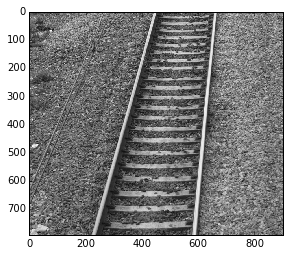

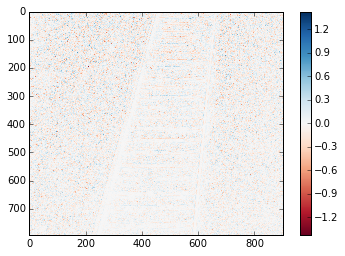

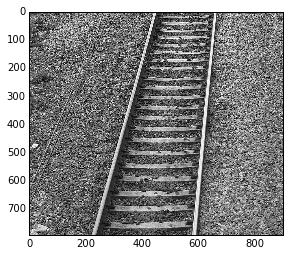

In [80]:
Path = './images/'
railway = io.imread(Path.__add__('railway.jpg'),as_grey=True)
railway = img_as_float(railway)
io.imshow(railway)

plt.figure()
railway_laplace = ndimage.filters.laplace(railway)
io.imshow(railway_laplace)

plt.figure()
railway_orig_minus_laplace = railway-railway_laplace
plll = plt.imshow(railway_orig_minus_laplace , cmap = cm.gray, vmin=0, vmax=1.)
#you show it normalized. It doesn't mean the original copy is normalized. This is a function for showing.
#we see that the image is sharpened

## Hough transform

** Define your Hough_trans function which finds the lines within an image** 

you can use either `hough_line` and `hough_line_peaks` or `probabilistic_hough_line` from [`skimage.transform`](http://scikit-image.org/docs/dev/api/skimage.transform.html). 

search a bit to know the difference between `probablistic_hough_line` and `hough_line`

Or `HoughLines` and `HoughLinesP` from [`cv2`](http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html)


Test your function on `railway` and `building` images. 

**Note : use `skimage.feature.canny` (`cv2.canny`) edge detector to find the primary edges**

In [ ]:
##show the image and show the ines that you find in the image